#### Data Exploration (using visuals) and Data Cleaning
In this section, I start to explore the raw dataset, and think about how I will use it. <br>
It would also influence my decision on how to clean the data. <br>

In [153]:
# Import Libraries
# Packages for work.
import requests
import time
import os
import pandas as pd
import numpy as np

# Visualization packages.
import matplotlib.pyplot as plt
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
import plotly.express as px
import seaborn as sns

In [154]:
# Reading in the raw dataset.
raw_dataset = pd.read_excel("raw_dataset.xlsx")

Some preliminary checks on the dataset.

In [155]:
# Checking that the dataset has been loaded in correctly. It should have 9319 rows and 4 columns.
raw_dataset.shape

(9319, 4)

In [156]:
# Taking a peek again.
raw_dataset.head()

,appid,game name,hours played,steamid
0,220,Half-Life 2,0.0,76561198010430483
1,320,Half-Life 2: Deathmatch,0.0,76561198010430483
2,340,Half-Life 2: Lost Coast,0.0,76561198010430483
3,360,Half-Life Deathmatch: Source,0.0,76561198010430483
4,380,Half-Life 2: Episode One,0.0,76561198010430483


In [157]:
pd.DataFrame(raw_dataset.dtypes, columns=['Data Type'])

,Data Type
appid,int64
game name,object
hours played,float64
steamid,int64


In [158]:
# Changing the app id and steam id data to string type.   
raw_dataset['appid'] = raw_dataset['appid'].astype(str)
raw_dataset['steamid'] = raw_dataset['steamid'].astype(str)

In [159]:
# Checking for null values.
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9319 entries, 0 to 9318
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   appid         9319 non-null   object 
 1   game name     9319 non-null   object 
 2   hours played  9319 non-null   float64
 3   steamid       9319 non-null   object 
dtypes: float64(1), object(3)
memory usage: 291.3+ KB


In [160]:
raw_dataset.describe()

,hours played
count,9319.000000
mean,42.288727
std,315.342750
min,0.000000
25%,0.000000
50%,1.366667
75%,11.225000
max,11522.383333


In [161]:
raw_dataset.nunique()

appid           3266
game name       3259
hours played    2497
steamid           52
dtype: int64

I started with 53 unique users, but there are only 52. It is possible that 1 user made private his profile and I was unable to retrieve his data. <br>
Noted that unique number of appid and game_name are unequal, which is strange because each game is supposed to have a unique appid. <br>

#### Investigating which games have multiple App IDs, then replacing the incorrect App IDs. <br>
We minimally need to ensure that each game only has 1 unique App ID for identification. The "correct" or "official" App ID is not crucial.  <br>

In [162]:
# Group the dataset by game name, and count the number of unique appids per game.
game_grouped = raw_dataset.groupby('game name')['appid'].nunique()

# Filter for games with more than 1 unique game_id.
games_with_multiple_ids = game_grouped[game_grouped > 1]

print(f"The games with multiple IDs are:")
games_with_multiple_ids = pd.DataFrame(games_with_multiple_ids).reset_index()
games_with_multiple_ids

The games with multiple IDs are:


,game name,appid
0,Grand Theft Auto III,2
1,Grand Theft Auto: San Andreas,2
2,Grand Theft Auto: Vice City,2
3,Sid Meier's Civilization IV,2
4,Sid Meier's Civilization IV: Beyond the Sword,2
5,Sid Meier's Civilization IV: Warlords,2
6,TERA,2


Now that we have the list of games with multiple IDs, we can filter the dataset for those games to take a look.

In [163]:
games_with_multiple_ids_list = list(games_with_multiple_ids["game name"])


multiple_ids_df = raw_dataset[raw_dataset["game name"].isin(games_with_multiple_ids_list)][["appid","game name"]].sort_values(by="game name")
multiple_ids_df

,appid,game name
7764,12230,Grand Theft Auto III
7759,12100,Grand Theft Auto III
8885,12250,Grand Theft Auto: San Andreas
7766,12250,Grand Theft Auto: San Andreas
1333,12120,Grand Theft Auto: San Andreas
1334,12250,Grand Theft Auto: San Andreas
7761,12120,Grand Theft Auto: San Andreas
8884,12120,Grand Theft Auto: San Andreas
7765,12240,Grand Theft Auto: Vice City
7760,12110,Grand Theft Auto: Vice City


In [164]:
pd.DataFrame(multiple_ids_df.groupby("game name")["appid"].unique())

,appid
game name,
Grand Theft Auto III,"[12230, 12100]"
Grand Theft Auto: San Andreas,"[12250, 12120]"
Grand Theft Auto: Vice City,"[12240, 12110]"
Sid Meier's Civilization IV,"[34440, 3900]"
Sid Meier's Civilization IV: Beyond the Sword,"[34460, 8800]"
Sid Meier's Civilization IV: Warlords,"[3990, 34450]"
TERA,"[323370, 212740]"


After checking online sources, the correct app IDs for the above games are:

Grand Theft Auto III : 12230 <br>
https://steamdb.info/app/12230/

Grand Theft Auto: San Andreas : 12120 <br>
https://steamdb.info/app/12120/

Grand Theft Auto: Vice City: 12240 <br>
https://steamdb.info/app/12240/

Sid Meier's Civilization IV	: 3900 <br>
https://steamdb.info/app/3900/

Sid Meier's Civilization IV: Beyond the Sword : 8800 <br>
https://steamdb.info/app/8800/

Sid Meier's Civilization IV: Warlords : 3990 <br>
https://steamdb.info/app/3990/

TERA : 212740 <br>
https://steamdb.info/app/212740/

As mentioned above, the accuracy of which app ID is the "correct" or "official" one does not have much impact on our analysis later, since the app ID is used more to identify the games.

In [165]:
# Replacing the app IDs.
raw_dataset["appid"].replace("12100", "12230", inplace=True)
raw_dataset["appid"].replace("12250", "12120", inplace=True)
raw_dataset["appid"].replace("12110", "12240", inplace=True)
raw_dataset["appid"].replace("34440", "3900", inplace=True)
raw_dataset["appid"].replace("34460", "8800", inplace=True)
raw_dataset["appid"].replace("34450", "3990", inplace=True)
raw_dataset["appid"].replace("323370", "212740", inplace=True)

In [166]:
# Checking the unique values again. The number of App IDs should be equal to the number of unique game names.
raw_dataset.nunique()

appid           3259
game name       3259
hours played    2497
steamid           52
dtype: int64

In [167]:
# Checking that the games with multiple App IDs now all have the same App ID.
raw_dataset[raw_dataset["game name"].isin(games_with_multiple_ids_list)].sort_values(by="game name")

,appid,game name,hours played,steamid
7764,12230,Grand Theft Auto III,0.000000,76561197965527053
7759,12230,Grand Theft Auto III,0.083333,76561197965527053
8885,12120,Grand Theft Auto: San Andreas,0.000000,76561197991050584
7766,12120,Grand Theft Auto: San Andreas,0.000000,76561197965527053
1333,12120,Grand Theft Auto: San Andreas,0.000000,76561198010002949
1334,12120,Grand Theft Auto: San Andreas,0.000000,76561198010002949
7761,12120,Grand Theft Auto: San Andreas,0.450000,76561197965527053
8884,12120,Grand Theft Auto: San Andreas,2.016667,76561197991050584
7765,12240,Grand Theft Auto: Vice City,0.000000,76561197965527053
7760,12240,Grand Theft Auto: Vice City,0.000000,76561197965527053


#### Removing unplayed games / games with 0 playtime.

Next, we take a look at playtimes of each player, and the playtimes of each player on the games they own.

In [168]:
raw_dataset["hours played"].describe()

count     9319.000000
mean        42.288727
std        315.342750
min          0.000000
25%          0.000000
50%          1.366667
75%         11.225000
max      11522.383333
Name: hours played, dtype: float64

The minimum hours played is 0. However, I want to focus on games that have been played, as playtime on a game is an indicator / proxy for a user's preference towards it. <br>
We can remove games that have a playtime of 0 hours. <br>

In [169]:
# Dropping rows (games) with 0 hours played.
dataset_cleaned = raw_dataset.drop(raw_dataset[raw_dataset["hours played"] == 0].index)

In [170]:
print(dataset_cleaned["hours played"].describe())

count     6256.000000
mean        62.993710
std        383.186210
min          0.016667
25%          1.300000
50%          5.475000
75%         22.691667
max      11522.383333
Name: hours played, dtype: float64


We are left with 6256 rows, and the minimum hours played is 0.01667. <br>
The remaining rows are games that were definitely played by all users at some point (playtime > 0). <br>

#### Checkpoint. Save the dataset_cleaned to excel.

In [171]:
dataset_cleaned.to_excel("dataset_cleaned.xlsx", index=False)

#### Checking for outliers
Now, we check for outliers. For a start, I want to trim the dataset slightly. With fewer users, it would be easier for me to fix issues I face later. <br>
However, do note that our recommender can still be applied on all 52 users and their data. <br>

In [172]:
per_user_gamecount = dataset_cleaned.groupby("steamid")["game name"].count()
per_user_totalhoursplayed = dataset_cleaned.groupby("steamid")["hours played"].sum()

In [173]:
per_user_data = pd.DataFrame(columns={"game count", "total hours played"})
per_user_data["game count"] = per_user_gamecount
per_user_data["total hours played"] = per_user_totalhoursplayed

In [174]:
per_user_data = per_user_data.sort_values(by="game count", ascending=False)
per_user_data.reset_index(inplace=True)
per_user_data

,steamid,total hours played,game count
0,76561198010183102,17167.716667,611
1,76561197964812023,17229.483333,558
2,76561198010002949,17035.333333,380
3,76561198004094042,30479.083333,349
4,76561198014294480,10677.183333,314
5,76561198001281625,13263.466667,285
6,76561197993300234,10787.600000,264
7,76561198039203265,14148.566667,234
8,76561197965527053,7095.933333,210
9,76561198001262177,20687.633333,199


In [175]:
per_user_data.describe()

,total hours played,game count
count,52.000000,52.000000
mean,7578.627885,120.307692
std,6744.846405,131.860821
min,1.900000,1.000000
25%,3092.958333,43.000000
50%,5150.725000,63.000000
75%,10599.408333,170.250000
max,30479.083333,611.000000


<AxesSubplot:>

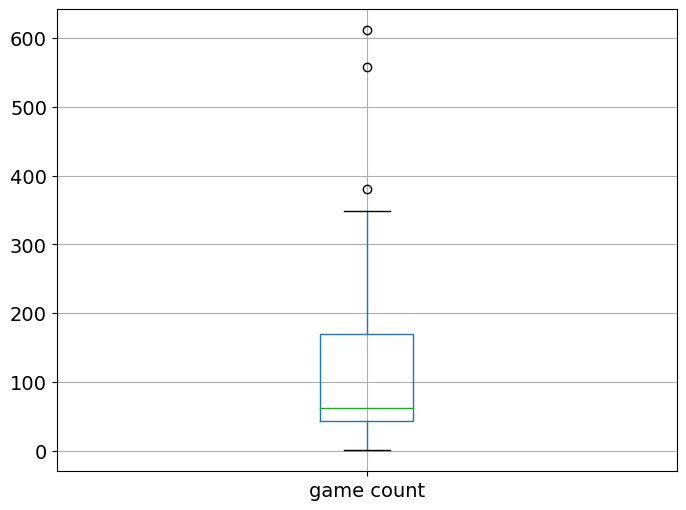

In [176]:
per_user_data.boxplot("game count")

<AxesSubplot:ylabel='game count'>

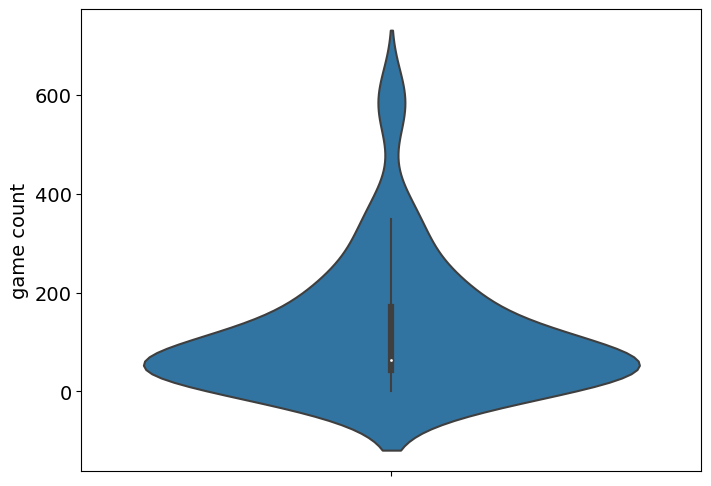

In [177]:
sns.violinplot(y=per_user_data["game count"])

In [178]:
fig = px.scatter(per_user_data, x="total hours played", y="game count",color="steamid",title="Scatter plot of total hours played and games played per user (playtime > 0)")
fig.show()

In [179]:
fig = px.bar(per_user_data, x="steamid", y="game count",color="steamid",title="Number of games played per user (with playtime > 0)",text_auto=True)
fig.show()

Looking at the spread of number of games played per user, we can see that there are some users who have played as many as 200 over games, and there are those at the lower end who have played fewer than 30 games. <br>
We can trim our dataset by removing outliers. <br>
Since the median number of games played is 63, we can take 18 users above and below the median. This means users who played between 37 to 210 games inclusive. <br>

In [180]:
selected_users = per_user_data[(per_user_data["game count"] <= 210) & (per_user_data["game count"] >= 30)]
selected_users

,steamid,total hours played,game count
8,76561197965527053,7095.933333,210
9,76561198001262177,20687.633333,199
10,76561198039495811,3515.383333,189
11,76561197970738118,7516.466667,176
12,76561197984628526,7802.350000,171
13,76561197991050584,25310.583333,170
14,76561198004803656,3973.266667,165
15,76561197970683033,4910.233333,162
16,76561198092753159,10418.916667,128
17,76561197985630263,5391.216667,110


The spread of the data of this trimmed group of users is slightly more balanced.

In [181]:
selected_users.describe()

,total hours played,game count
count,36.000000,36.000000
mean,6926.204630,88.388889
std,5632.117756,53.891573
min,876.700000,37.000000
25%,3481.941667,49.750000
50%,5150.725000,63.000000
75%,8471.475000,114.500000
max,25310.583333,210.000000


<AxesSubplot:>

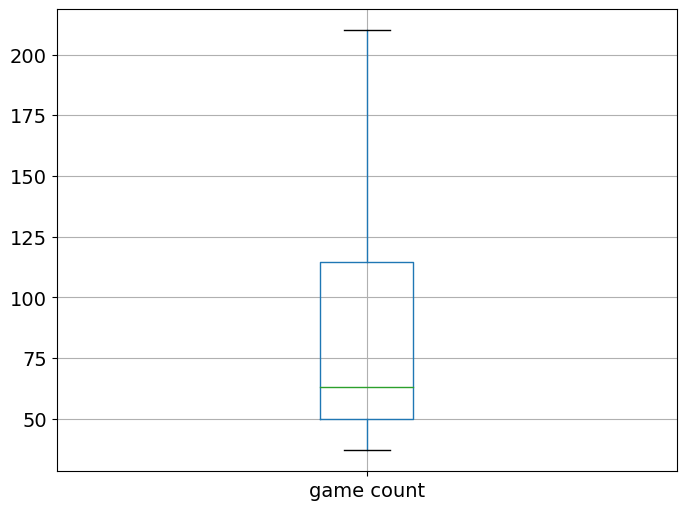

In [182]:
selected_users.boxplot("game count")

<AxesSubplot:ylabel='game count'>

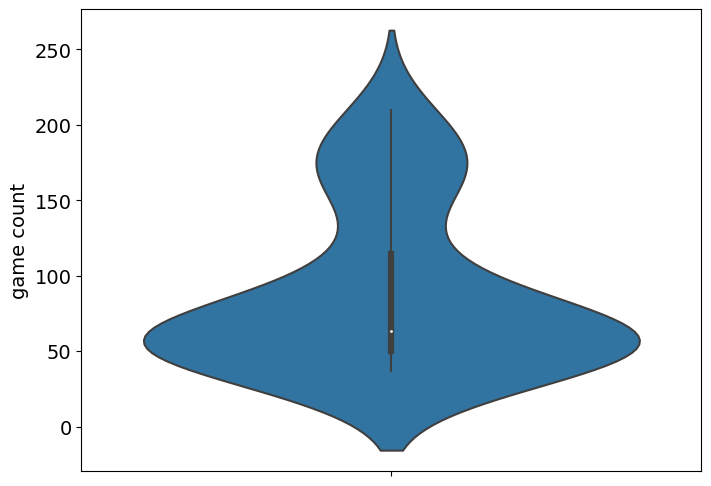

In [183]:
sns.violinplot(y=selected_users["game count"])

In [184]:
fig = px.scatter(selected_users, x="total hours played", y="game count",color="steamid",title="Scatter plot of total hours played and games played per user (playtime > 0)")
fig.show()

In [185]:
fig = px.bar(selected_users, x="steamid", y="game count",color="steamid",title="Number of games played per user",text_auto=True)
fig.show()

Extracting only the relevant rows from the original dataset for the selected 36 users. <br>

In [186]:
dataset_trimmed = dataset_cleaned[dataset_cleaned["steamid"].isin(selected_users["steamid"])]
dataset_trimmed

,appid,game name,hours played,steamid
5,400,Portal,6.116667,76561198010430483
10,13640,Tom Clancy's Ghost Recon: Advanced Warfighter,0.366667,76561198010430483
11,15300,Tom Clancy's Ghost Recon,0.600000,76561198010430483
12,17300,Crysis,13.800000,76561198010430483
13,17330,Crysis Warhead,0.016667,76561198010430483
...,...,...,...,...
9291,1620690,Rubber Bandits: Summer Prologue,0.850000,76561198092753159
9292,461040,PICO PARK:Classic Edition,0.016667,76561198092753159
9293,1942280,Brotato,86.100000,76561198092753159
9294,1948280,Stacklands,13.683333,76561198092753159


In [187]:
dataset_trimmed.nunique()

appid           1410
game name       1410
hours played    1596
steamid           36
dtype: int64

In [188]:
dataset_trimmed.describe()

,hours played
count,3182.000000
mean,78.360580
std,449.085669
min,0.016667
25%,1.150000
50%,5.375000
75%,24.333333
max,10814.000000


Summary: <br>
1. 3182 rows of games with playtime > 0.
2. 36 unique users
3. 1410 unique games
4. Hours played ranges from 0.016667 to 10814 hours.

Save the trimmed dataset. We will work with this for our recommender. <br>
If the project goes well, we can use the dataset_cleaned, with all 52 users account data. <br>

In [189]:
dataset_trimmed.to_excel("dataset_trimmed.xlsx",index=False)